In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [2]:
train = pd.read_csv('input/train.csv')
print(train.head())
print()
print(train.info())

   id  label               province               district  age_source1  \
0   0      0                    NaN                    NaN          NaN   
1   1      0          Tỉnh Đồng Nai     Thành phố Biên Hòa         44.0   
2   2      0          Tỉnh Đồng Nai       Huyện Long Thành         30.0   
3   3      0       Tỉnh Tuyên Quang  Thành phố Tuyên Quang         43.0   
4   4      0  Thành phố Hồ Chí Minh                 Quận 1         21.0   

   age_source2       maCv  FIELD_1  FIELD_2  FIELD_3   ...     FIELD_48  \
0          NaN        NaN        1      1.0   2547.0   ...         True   
1         44.0       None        1      0.0     -1.0   ...        False   
2         30.0  Công nhân        0      1.0   3273.0   ...         True   
3          NaN        NaN        0      1.0   3991.0   ...         True   
4         21.0       None        0      1.0   1450.0   ...         True   

   FIELD_49  FIELD_50 FIELD_51 FIELD_52 FIELD_53 FIELD_54 FIELD_55 FIELD_56  \
0      True       N

e:\app\python3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


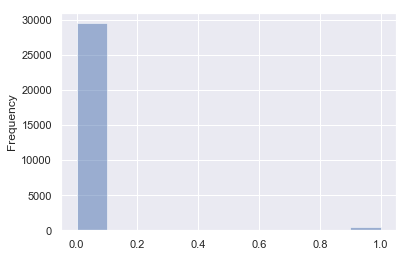

In [3]:
target = train.label
# train.drop(columns=['label'])
target.plot.hist(alpha=0.5)

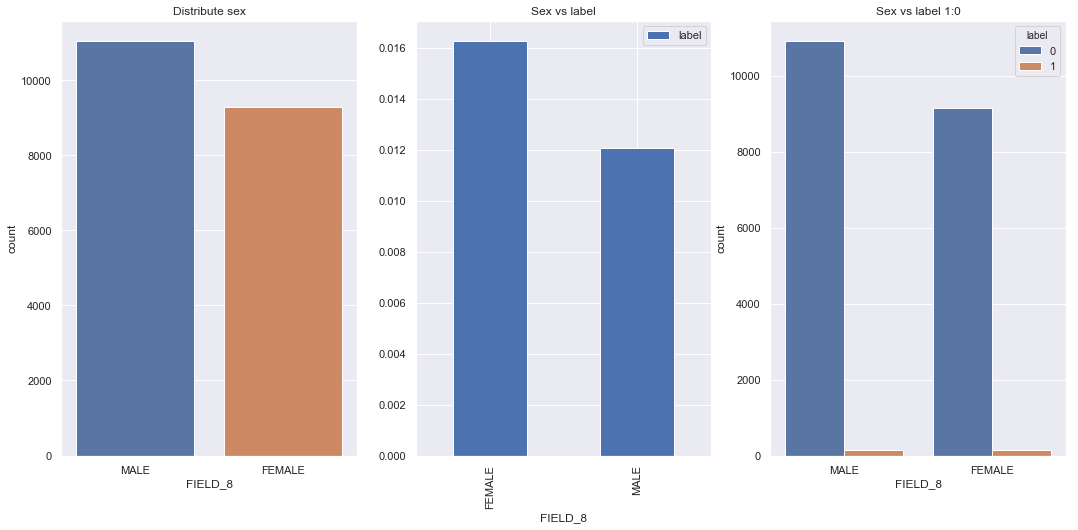

In [4]:
# Sex
sex = train.FIELD_8
train.groupby(['FIELD_8', 'label'])['label'].count()
f, ax = plt.subplots(1,3,figsize=(18,8))

sns.countplot(x="FIELD_8", data=train, ax=ax[0])
ax[0].set_title('Distribute sex')

train[['FIELD_8','label']].groupby(['FIELD_8']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Sex vs label')

ax[2] = sns.countplot('FIELD_8', hue='label', data=train, ax=ax[2])
ax[2].set_title('Sex vs label 1:0')
plt.show()

Oldest source 1: 71.0	Oldest source 2: 89.0
Youngest source 1: 0.0	Youngest source 2: -1.0
Average source 1: 33.041014602361976	Average source 2: 32.87201062887511


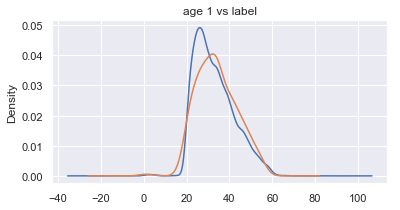

Text(0.5, 1.0, 'age 2 vs label')

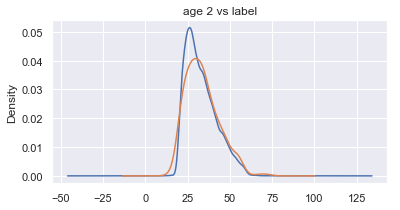

In [5]:
# age
print('Oldest source 1: ' + str(train.age_source1.max())+ '\tOldest source 2: ' + str(train.age_source2.max()))
print('Youngest source 1: ' + str(train.age_source1.min())+'\tYoungest source 2: ' + str(train.age_source2.min()))
print('Average source 1: ' + str(train.age_source1.mean())+ '\tAverage source 2: ' + str(train.age_source2.mean()))

f, ax = plt.subplots(1,1, figsize=(6,3))
ax = train[train['label'] == 0].age_source1.plot.kde()
ax = train[train['label'] == 1].age_source1.plot.kde()
ax.set_title('age 1 vs label')
plt.show()
f, ax = plt.subplots(1,1, figsize=(6,3))
ax = train[train['label'] == 0].age_source2.plot.kde()
ax = train[train['label'] == 1].age_source2.plot.kde()
ax.set_title('age 2 vs label')

In [6]:
# province
from pyvi import ViTokenizer as tokenizer
def tokenize(s):
    return tokenizer.tokenize(str(s)).lower()
train['token_province'] = train['province'].apply(lambda x: tokenize(x))


In [7]:
from wordcloud import WordCloud
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(list(train[train.label == 1]['token_province'].values)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

ImportError: No module named 'wordcloud'

In [ ]:
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(list(train[train.label == 0]['token_province'].values)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# maCV
train['token_maCv'] = train['maCv'].apply(lambda x: tokenize(x))
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(list(train[train.label == 1]['token_maCv'].values)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(list(train[train.label == 0]['token_maCv'].values)))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
float_cols = [col for col in train.columns if (col.startswith('FIELD') and str(train[col].dtypes) == 'float64')]
print()
float_cols

In [ ]:
def subplot_float(df, cols, ax):
#     ax.hist(df[df.label==0][cols].dropna(), bins=10, label=float_cols[0+i*4] + '- label 0')
#     ax.hist(df[df.label==1][cols].dropna(), bins=10, label=float_cols[0+i*4] + '- label 1')
#     ax.hist(df[cols].dropna(), bins=10, label=cols)
#     ax.legend()
    sns.distplot(df[df['label'] == 0][cols].fillna(-2.0), ax=ax, bins=10, label='label 0')
    sns.distplot( df[df['label'] == 1][cols].fillna(-2.0), ax=ax, bins=10, label='label 1')
    ax.legend()
axs = (None, None, None, None)
fig, axsz = plt.subplots(4,4, figsize=(16, 16))
for i, axs in enumerate(axsz):
    (ax0, ax1, ax2, ax3) = axs
    subplot_float(train, float_cols[0+i*4], ax0)
    subplot_float(train, float_cols[1+i*4], ax1)
    subplot_float(train, float_cols[2+i*4], ax2)
    subplot_float(train, float_cols[3+i*4], ax3)
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
# sns.distplot(train['FIELD_51'].fillna(-1))

In [ ]:
bool_cols = [col for col in train.columns if (col.startswith('FIELD') and str(train[col].dtypes) == 'bool')]
print()
bool_cols

In [ ]:
int_cols = [col for col in train.columns if (col.startswith('FIELD') and str(train[col].dtypes) == 'int64')]
print()


In [ ]:
def subplot_float(df, cols, ax):
#     ax.hist(df[df.label==0][cols].dropna(), bins=10, label=float_cols[0+i*4] + '- label 0')
#     ax.hist(df[df.label==1][cols].dropna(), bins=10, label=float_cols[0+i*4] + '- label 1')
#     ax.hist(df[cols].dropna(), bins=10, label=cols)
#     ax.legend()
    sns.distplot(df[df['label'] == 0][cols].fillna(-2.0), ax=ax, bins=10, label='label 0')
    sns.distplot( df[df['label'] == 1][cols].fillna(-2.0), ax=ax, bins=10, label='label 1')
    ax.legend()
axs = (None, None, None, None)
fig, axsz = plt.subplots(7,1, figsize=(8, 16))
for i, axs in enumerate(axsz):
    subplot_float(train, int_cols[i], axs)
plt.show()

In [ ]:
# FEATURE ENGINEERING


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import preprocessing

In [ ]:
train_cols = [col for col in train.columns if col not in ['province', 'district', 'maCv', 'label', 'FIELD_7', 'token_province', 'token_maCv']]
# train_cols = [col for col in train.columns if col not in ['label']]

In [ ]:
category_cols = [col for col in train_cols if str(train[col].dtypes) == 'object']
print(category_cols)
print()
print(train[category_cols].head())

In [ ]:
# one hot encoding
for col in category_cols:
    train[col] = train[col].fillna('NaN')
    one_hot = pd.get_dummies(train[col], prefix=col)
    # Drop column B as it is now encoded
    train = train.drop(col,axis = 1)
    # Join the encoded df
    train = train.join(one_hot)
#     le = preprocessing.LabelEncoder()
#     le.fit(train[col].astype(str))
#     train[col] = le.transform(train[col].astype(str))
print(train.columns)
print()
print(train.head())

In [ ]:
print(train.columns)
train_cols = [col for col in train.columns if col not in ['province', 'district', 'maCv', 'label', 'FIELD_7', 'token_province', 'token_maCv']]
# train_cols = [col for col in train.columns if col not in ['label']]

In [ ]:
train_y = train.label
train.drop(columns=['label'])
train_X = train[train_cols]

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y,test_size=0.4, random_state=0)

In [ ]:
# training model
params={
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'binary:logistic',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'nrounds': 200
    }

clf = XGBClassifier(**params)
clf.fit(train_X, train_y, \
        eval_set=[(train_X, train_y), (val_X, val_y)], \
                  eval_metric='auc', early_stopping_rounds = 50)

In [ ]:
train['FIELD_10'].value_counts()

In [ ]:
len(dict(train['FIELD_9'].value_counts()).keys())

In [ ]:
dict(train['FIELD_13'].value_counts()).keys()

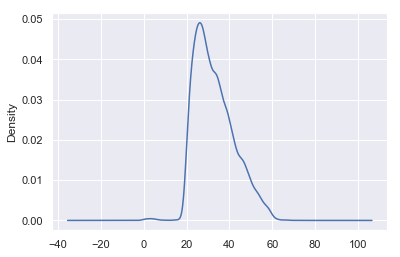

In [8]:
train['age_source1'].plot.kde()

In [11]:
train['age_source1'].median()

31.0

In [12]:
train['age_source2'].median()

31.0

In [33]:
train['FIELD_1'].unique()

array([1, 0], dtype=int64)

In [14]:
train['FIELD_2'].isnull().sum()
print(train['FIELD_2'])

463

In [20]:
train[train['FIELD_2']==1][train['FIELD_3'] != -1]

e:\app\python3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,label,province,district,age_source1,age_source2,maCv,FIELD_1,FIELD_2,FIELD_3,...,FIELD_49,FIELD_50,FIELD_51,FIELD_52,FIELD_53,FIELD_54,FIELD_55,FIELD_56,FIELD_57,token_province
0,0,0,NaN,NaN,NaN,NaN,NaN,1,1.0,2547.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
2,2,0,Tỉnh Đồng Nai,Huyện Long Thành,30.0,30.0,Công nhân,0,1.0,3273.0,...,True,29.770,56.512,30.955,31.171,0.00,0.16,0.00,0.00,tỉnh đồng_nai
3,3,0,Tỉnh Tuyên Quang,Thành phố Tuyên Quang,43.0,NaN,NaN,0,1.0,3991.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tỉnh tuyên_quang
4,4,0,Thành phố Hồ Chí Minh,Quận 1,21.0,21.0,None,0,1.0,1450.0,...,True,29.770,13.789,30.955,31.171,0.00,0.03,0.00,0.00,thành_phố hồ_chí_minh
5,5,0,NaN,NaN,NaN,NaN,NaN,1,1.0,1812.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
7,7,0,Tỉnh Bắc Giang,Huyện Yên Dũng,40.0,32.0,Công nhân,1,1.0,2906.0,...,True,29.770,40.683,30.955,31.171,0.00,0.13,0.00,0.00,tỉnh bắc_giang
9,9,0,NaN,NaN,NaN,NaN,NaN,1,1.0,2544.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
10,10,0,Tỉnh Thanh Hóa,Huyện Nga Sơn,25.0,25.0,None,1,1.0,2168.0,...,True,29.770,61.764,30.955,31.171,0.00,0.19,0.00,0.00,tỉnh thanh_hóa
11,11,0,Thành phố Hồ Chí Minh,Huyện Hóc Môn,31.0,64.0,None,1,1.0,3262.0,...,True,29.770,25.758,30.955,31.171,0.00,0.05,0.00,0.00,thành_phố hồ_chí_minh
13,13,0,NaN,NaN,NaN,NaN,NaN,1,1.0,706.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan


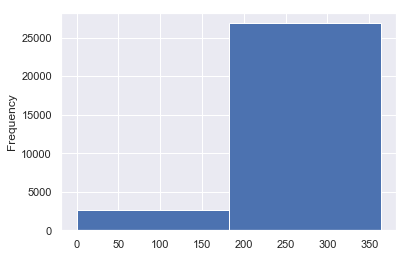

In [23]:
(train['FIELD_3'] % 365).plot.hist(bins=2)

In [30]:
train['FIELD_11'].unique()

array([nan, '12', '3', '7', '0', '1', '6', '10', '24', '11', '60', '13',
       '8', '36', '2', '34', '5', 'None', '4', '9', '19', '15', '30',
       '20', '56', '25', '35', '69', '17', '54', '42', '14', '16', '21',
       '22', '47', '26', '45', '28', '18', '27', '32', '37', '72', '70',
       '59'], dtype=object)

In [15]:
print(train['FIELD_4'].isnull().sum())
print(train['FIELD_5'].isnull().sum())
print(train['FIELD_6'].isnull().sum())
print(train['FIELD_7'].isnull().sum())
print(train['FIELD_11'].isnull().sum())

463
463
463
463
9678


In [18]:
print(train['FIELD_13'].isnull().sum())

9700


In [7]:
train['FIELD_4'].unique()

array([ 0.,  1., nan,  2.,  3.,  4.,  5.,  6.,  8.,  7., 12.])

In [8]:
train['FIELD_5'].unique()

array([ 0.,  1.,  4.,  2., nan,  6.,  3.,  5.,  7.,  8., 11.,  9., 12.,
       14., 10., 13.])

In [10]:
train['FIELD_6'].unique()

array([ 0.,  1., nan,  2.,  3.,  4.])

In [20]:
train['FIELD_11'].unique()

array([nan, '12', '3', '7', '0', '1', '6', '10', '24', '11', '60', '13',
       '8', '36', '2', '34', '5', 'None', '4', '9', '19', '15', '30',
       '20', '56', '25', '35', '69', '17', '54', '42', '14', '16', '21',
       '22', '47', '26', '45', '28', '18', '27', '32', '37', '72', '70',
       '59'], dtype=object)

In [23]:
train['FIELD_12'].value_counts()

0       16650
None     3599
1          71
TN          1
HT          1
Name: FIELD_12, dtype: int64

In [27]:
train['FIELD_13'].unique()

array([nan, 'BI', 'YN', 'TG', 'TB', 'QW', 'AQ', 'TO', 'TI', 'TC', 'FI',
       'BO', 'HI', 'TZ', 'HZ', 'HW', 'AC', 'HK', 'TL', 'BT', 'TA', 'TJ',
       'AO', 'TD', 'TN', 'TH', 'HB', 'TK', 'HF', 'HJ', 'KC', 'DA', 'TE',
       'TM', 'NT', 'TX', 'FF', 'AI', 'HD', 'TP', 'HG', 'AR', 'QA', 'TY',
       'QZ', 'TQ', 'AP', 'HH', 'T5', 'HE', 'HL', 'TU', 'TV', 'FE', 'TF',
       'HA', 'HC', 'TW', 'TS', 'T9', 'QI', 'BQ', 'SN', 'QB', 'BD', 'BN',
       '0', 'SG', 'AB', 'HX', 'KT', 'AL', 'FJ', 'DW', 'BA', 'SP', 'YV',
       'BH', 'TT', 'NI', 'FB', 'QD', 'YA', 'NK', 'SY', 'AA', 'HY', 'HR',
       'NE', 'QG', 'EB', 'FA', 'SL', 'T7', 'NQ', 'BP', 'CA', 'SS', 'T3',
       'NW', 'YF', 'DE', 'FV', 'AD', 'QF', 'NC', '8', 'QC', 'SI', 'HS',
       'SK', 'QO', 'FD', 'FK', 'BK', 'AH', 'FL', 'NV', 'HP', 'NB', 'FH',
       'FC', 'T1', 'EI', 'BE', 'QE', 'DC', 'TR', 'QU', 'A6', 'FP', 'FR',
       'SD', 'BB', 'QJ', 'QL', 'HQ', 'FS', 'AS', 'CD', 'HN', 'EA', 'CE',
       'H3', 'EJ', 'CJ', 'DQ', 'DB', 'DZ', 'DT', 'SA',

In [28]:
train['FIELD_16'].unique()


array([nan,  2.,  1.,  3.,  4.,  5.])

In [32]:
train['FIELD_17'].isnull().sum()

9678

In [36]:
train['FIELD_21'].unique()

array([nan,  1.,  2.,  0.])